<a href="https://colab.research.google.com/github/HeberPareja/IA-MiniRobots_2024-2/blob/master/EjercicioN6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Ejercicio N° 6.3
*   Universidad Nacional de Colombia
*   Inteligencia Artificial y Mini-Robots 2024-2
*   Heber Alexander Pareja Romero
*   haparejar@unal.edu.co

# **<> Referencia: Clasificador KNN - Victor Romero Bautista**

https://www.youtube.com/watch?v=qv0rb_A0f3M

# **<> Introducción**

Este código, encontrado en YouTube (referencia en la parte superior), implementa un clasificador k-Nearest Neighbors (KNN) para clasificar individuos en dos categorías según su peso y estatura. Utiliza la distancia euclidiana para calcular la cercanía entre los puntos y asignar una clase mediante votación mayoritaria de los k vecinos más cercanos. Además, genera una visualización gráfica de los datos y las nuevas clasificaciones, facilitando su interpretación.

# **<> Desarrollo**

Se implementa un clasificador basado en el algoritmo k-Nearest Neighbors (KNN). La clase KNN tiene dos métodos principales: aprendizaje, que almacena los datos de entrenamiento X junto con sus clases C, y clasificacion, que clasifica nuevos datos Y comparando sus distancias con los datos de entrenamiento usando la distancia euclidiana. Para cada punto de entrada, encuentra los k vecinos más cercanos y asigna la clase más común entre ellos usando el método de votación mayoritaria con la librería Counter.

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  2 17:49:29 2020

@author: Victor
"""
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def aprendizaje(self,X,C):
        self.X=X # matriz de vectores de caracteristicas
        self.c=C # clases asociadas a cada vector x(n)
        self.n_muestras=X.shape[1] # cantidad de muestras

    def clasificacion(self,Y):
        clases=[]
        for i in range(Y.shape[1]): # por cada vector y(n) a clasificar
            distancias=np.empty(self.n_muestras)
            for n in range(self.n_muestras): # por cada vector x(n) de caracteristicas
                distancias[n]=EUCLIDIANA(self.X[:,n],Y[:,i])

            # distancias mas cercanas
            k_distancias=np.argsort(distancias)
            # identificar las k distancias - clases
            k_etiqueta=self.c[k_distancias[:self.k]]
            print(k_etiqueta)
            # votacion
            c = Counter(k_etiqueta).most_common(1)#(5,0)
            clases.append(c[0][0]) # almacenamos la clase asignada al vector y(n)
        return clases


def EUCLIDIANA(x,y):
    return np.sqrt(np.sum((x-y)**2))

Se define un conjunto de datos con características de personas, específicamente peso y estatura, y los clasifica en dos grupos: niños y adultos. Los datos se representan como matrices y se combinan en una sola estructura llamada X, con sus respectivas etiquetas de clase en C. Luego, se definen nuevos puntos a clasificar en Y. Mediante un gráfico de dispersión, se visualizan los datos con diferentes colores y marcadores según su categoría, utilizando la biblioteca matplotlib. Finalmente, se agregan etiquetas a los ejes y un título al gráfico.

<ipython-input-7-3c984591c0a8>:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


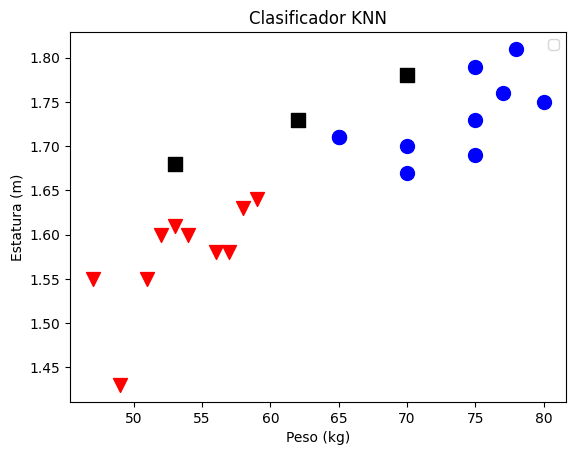

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  2 13:02:24 2020

@author: Victor
"""

import numpy as np
import matplotlib.pyplot as plt

# x(n)--< Peso kg,Est. mtrs >---
x1=np.array([[49],[1.43]]) # ninos
x2=np.array([[51],[1.55]])
x3=np.array([[57],[1.58]])
x4=np.array([[47],[1.55]])
x5=np.array([[54],[1.60]])
x6=np.array([[56],[1.58]])
x7=np.array([[59],[1.64]])
x8=np.array([[53],[1.61]])
x9=np.array([[58],[1.63]])
x10=np.array([[52],[1.60]]) # adultos
x11=np.array([[75],[1.73]])
x12=np.array([[80],[1.75]])
x13=np.array([[75],[1.69]])
x14=np.array([[65],[1.71]])
x15=np.array([[75],[1.79]])
x16=np.array([[77],[1.76]])
x17=np.array([[65],[1.71]])
x18=np.array([[70],[1.70]])
x19=np.array([[78],[1.81]])
x20=np.array([[70],[1.67]])

c0=np.zeros(10)
c1=np.ones(10)

X=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20),axis=1)
C=np.concatenate((c0,c1),axis=0)
C=np.uint8(C)

# nuevos datos a clasificar con KNN
y1=np.array([[62],[1.73]])
y2=np.array([[70],[1.78]])
y3=np.array([[53],[1.68]])
Y=np.concatenate((y1,y2,y3),axis=1)

for i in range(X.shape[1]):
    if C[i]==0:
        marcar='v'
        color='red'
    else:
        marcar='o'
        color='blue'
    plt.scatter(x=X[0,i],y=X[1,i],c=color,s=100,marker=marcar)

for j in range(Y.shape[1]):
    plt.scatter(x=Y[0,j],y=Y[1,j],c='black',s=100,marker='s')

plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (m)')
plt.title('Clasificador KNN')
plt.legend()

Se ejecuta el clasificador KNN tres veces con diferentes valores de k, específicamente 3, 5 y 15. En cada iteración, se crea una instancia del clasificador con el valor de k correspondiente, se realiza la fase de aprendizaje con los datos de entrenamiento X y sus clases C, y luego se clasifica el conjunto de datos Y. Finalmente, se imprimen los resultados de la clasificación para cada valor de k, permitiendo comparar cómo varía la asignación de clases según el número de vecinos considerados.

In [10]:
# iniciar KNN
clasificador = KNN(k=3)
clasificador.aprendizaje(X,C) # fase de aprendizaje
clasificar = clasificador.clasificacion(Y)
print('clases de los puntos y(n): ',clasificar)

[1 1 0]
[1 1 1]
[0 0 0]
clases de los puntos y(n):  [1, 1, 0]


In [11]:
# iniciar KNN
clasificador = KNN(k=5)
clasificador.aprendizaje(X,C) # fase de aprendizaje
clasificar = clasificador.clasificacion(Y)
print('clases de los puntos y(n): ',clasificar)

[1 1 0 0 0]
[1 1 1 1 1]
[0 0 0 0 0]
clases de los puntos y(n):  [0, 1, 0]


In [12]:
# iniciar KNN
clasificador = KNN(k=15)
clasificador.aprendizaje(X,C) # fase de aprendizaje
clasificar = clasificador.clasificacion(Y)
print('clases de los puntos y(n): ',clasificar)

[1 1 0 0 0 0 1 1 0 0 0 0 1 1 1]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
clases de los puntos y(n):  [0, 1, 0]


# **<> Conclusiones**

A medida que el valor de k aumenta en el clasificador KNN, la clasificación de los nuevos puntos puede volverse más estable, pero también puede perder precisión al considerar vecinos más lejanos que pueden no ser representativos de la categoría real. Con valores bajos de k, el modelo es más sensible a la variabilidad de los datos, lo que puede generar clasificaciones más ajustadas pero también más propensas al ruido. Comparando los resultados para k=3, k=5 y k=15, se puede analizar cómo cambia la asignación de clases y determinar cuál es el mejor equilibrio entre precisión y estabilidad en función de los datos disponibles.